# This is a data mining and analysis project for CA683.
## The data we used was a large and rich dataset from the US Small Business Administration (SBA),We propose to use logistic regression to predict whether the bank loan should be rejected or approved.
## Project Title: SBA Loan Risk Analysis and Forecasting

## Team Member:
        Chenxi Zhang
        Jianyu He
        Minhui Chen
        Yuwei Chen

In [1]:
#import packets
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
from  sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from datetime import datetime
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import SGDRegressor
from xgboost import XGBClassifier

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## The Steps
 1. Loading data
 2. Basic data processing
   2.1.Handling of missing values
   2.2 Converting string data types to numeric types
   2.3 Outlier handling
   2.4 Analysis of the data determines the final column
   2.5 Determining eigenvalues, target values
   2.6 Segmentation of data
 3. Feature engineering (normalisation)
 4. Machine learning (logistic regression)
 5. Model evaluation

In [2]:
#1.load dataset
data = pd.read_csv("SBAnational.csv")

#get the columns that we think is useful
column_name = ["State","NAICS","ApprovalDate", "Term", "NoEmp", "NewExist", "CreateJob", "RetainedJob", "FranchiseCode", "UrbanRural", "LowDoc", "DisbursementDate", "DisbursementGross", "GrAppv", "SBA_Appv", "MIS_Status"]
data = data[column_name]
data.head(10)

D:\DT228-4Soft\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,State,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,GrAppv,SBA_Appv,MIS_Status
0,IN,451120,28-Feb-97,84,4,2.0,0,0,1,0,Y,28-Feb-99,"$60,000.00","$60,000.00","$48,000.00",P I F
1,IN,722410,28-Feb-97,60,2,2.0,0,0,1,0,Y,31-May-97,"$40,000.00","$40,000.00","$32,000.00",P I F
2,IN,621210,28-Feb-97,180,7,1.0,0,0,1,0,N,31-Dec-97,"$287,000.00","$287,000.00","$215,250.00",P I F
3,OK,0,28-Feb-97,60,2,1.0,0,0,1,0,Y,30-Jun-97,"$35,000.00","$35,000.00","$28,000.00",P I F
4,FL,0,28-Feb-97,240,14,1.0,7,7,1,0,N,14-May-97,"$229,000.00","$229,000.00","$229,000.00",P I F
5,CT,332721,28-Feb-97,120,19,1.0,0,0,1,0,N,30-Jun-97,"$517,000.00","$517,000.00","$387,750.00",P I F
6,NJ,0,2-Jun-80,45,45,2.0,0,0,0,0,N,22-Jul-80,"$600,000.00","$600,000.00","$499,998.00",CHGOFF
7,FL,811118,28-Feb-97,84,1,2.0,0,0,1,0,Y,30-Jun-98,"$45,000.00","$45,000.00","$36,000.00",P I F
8,FL,721310,28-Feb-97,297,2,2.0,0,0,1,0,N,31-Jul-97,"$305,000.00","$305,000.00","$228,750.00",P I F
9,CT,0,28-Feb-97,84,3,2.0,0,0,1,0,Y,30-Apr-97,"$70,000.00","$70,000.00","$56,000.00",P I F


In [3]:
#2.Basic data processing
##2.1 Handling of missing values
data.isnull().sum()

State                  14
NAICS                   0
ApprovalDate            0
Term                    0
NoEmp                   0
NewExist              136
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
LowDoc               2582
DisbursementDate     2368
DisbursementGross       0
GrAppv                  0
SBA_Appv                0
MIS_Status           1997
dtype: int64

In [4]:
#The percentage of missing values is so small that we simply drop
data = data.replace(to_replace="?", value=np.NaN)
data = data.dropna()
data.isnull().sum()

State                0
NAICS                0
ApprovalDate         0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
GrAppv               0
SBA_Appv             0
MIS_Status           0
dtype: int64

In [5]:
##2.2 Converting string data types to numeric types
#### Convert state to a label type and generate a numeric state code
data["State"] = data["State"].astype('category')
data.dtypes
data["State_code"] = data["State"].cat.codes
data.head(10)

,State,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,GrAppv,SBA_Appv,MIS_Status,State_code
0,IN,451120,28-Feb-97,84,4,2.0,0,0,1,0,Y,28-Feb-99,"$60,000.00","$60,000.00","$48,000.00",P I F,15
1,IN,722410,28-Feb-97,60,2,2.0,0,0,1,0,Y,31-May-97,"$40,000.00","$40,000.00","$32,000.00",P I F,15
2,IN,621210,28-Feb-97,180,7,1.0,0,0,1,0,N,31-Dec-97,"$287,000.00","$287,000.00","$215,250.00",P I F,15
3,OK,0,28-Feb-97,60,2,1.0,0,0,1,0,Y,30-Jun-97,"$35,000.00","$35,000.00","$28,000.00",P I F,36
4,FL,0,28-Feb-97,240,14,1.0,7,7,1,0,N,14-May-97,"$229,000.00","$229,000.00","$229,000.00",P I F,9
5,CT,332721,28-Feb-97,120,19,1.0,0,0,1,0,N,30-Jun-97,"$517,000.00","$517,000.00","$387,750.00",P I F,6
6,NJ,0,2-Jun-80,45,45,2.0,0,0,0,0,N,22-Jul-80,"$600,000.00","$600,000.00","$499,998.00",CHGOFF,31
7,FL,811118,28-Feb-97,84,1,2.0,0,0,1,0,Y,30-Jun-98,"$45,000.00","$45,000.00","$36,000.00",P I F,9
8,FL,721310,28-Feb-97,297,2,2.0,0,0,1,0,N,31-Jul-97,"$305,000.00","$305,000.00","$228,750.00",P I F,9
9,CT,0,28-Feb-97,84,3,2.0,0,0,1,0,Y,30-Apr-97,"$70,000.00","$70,000.00","$56,000.00",P I F,6


In [6]:
###In the LowDoc column, we replace Y with 1 and N with 0, 
### and In the MIS_Status column, we replace P I F with 1 and CHGOFF with 0
cleanup_boolean_value = {"LowDoc":{"Y":1, "N":0},
                        "MIS_Status":{"P I F":1,"CHGOFF":0}}
data = data.replace(cleanup_boolean_value)
data.head(10)

,State,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,GrAppv,SBA_Appv,MIS_Status,State_code
0,IN,451120,28-Feb-97,84,4,2.0,0,0,1,0,1,28-Feb-99,"$60,000.00","$60,000.00","$48,000.00",1,15
1,IN,722410,28-Feb-97,60,2,2.0,0,0,1,0,1,31-May-97,"$40,000.00","$40,000.00","$32,000.00",1,15
2,IN,621210,28-Feb-97,180,7,1.0,0,0,1,0,0,31-Dec-97,"$287,000.00","$287,000.00","$215,250.00",1,15
3,OK,0,28-Feb-97,60,2,1.0,0,0,1,0,1,30-Jun-97,"$35,000.00","$35,000.00","$28,000.00",1,36
4,FL,0,28-Feb-97,240,14,1.0,7,7,1,0,0,14-May-97,"$229,000.00","$229,000.00","$229,000.00",1,9
5,CT,332721,28-Feb-97,120,19,1.0,0,0,1,0,0,30-Jun-97,"$517,000.00","$517,000.00","$387,750.00",1,6
6,NJ,0,2-Jun-80,45,45,2.0,0,0,0,0,0,22-Jul-80,"$600,000.00","$600,000.00","$499,998.00",0,31
7,FL,811118,28-Feb-97,84,1,2.0,0,0,1,0,1,30-Jun-98,"$45,000.00","$45,000.00","$36,000.00",1,9
8,FL,721310,28-Feb-97,297,2,2.0,0,0,1,0,0,31-Jul-97,"$305,000.00","$305,000.00","$228,750.00",1,9
9,CT,0,28-Feb-97,84,3,2.0,0,0,1,0,1,30-Apr-97,"$70,000.00","$70,000.00","$56,000.00",1,6


In [7]:
#Deal with DisbursementGross,GrAppv and SBA_Appv column
## Remove $ character
data_removeDo = data
data_removeDo['DisbursementGross'] = data_removeDo['DisbursementGross'].map(lambda x: str(x)[1:])
data_removeDo['GrAppv'] = data_removeDo['GrAppv'].map(lambda x: str(x)[1:])
data_removeDo['SBA_Appv'] = data_removeDo['SBA_Appv'].map(lambda x: str(x)[1:])

data_removeDo.head(10)

,State,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,GrAppv,SBA_Appv,MIS_Status,State_code
0,IN,451120,28-Feb-97,84,4,2.0,0,0,1,0,1,28-Feb-99,"60,000.00","60,000.00","48,000.00",1,15
1,IN,722410,28-Feb-97,60,2,2.0,0,0,1,0,1,31-May-97,"40,000.00","40,000.00","32,000.00",1,15
2,IN,621210,28-Feb-97,180,7,1.0,0,0,1,0,0,31-Dec-97,"287,000.00","287,000.00","215,250.00",1,15
3,OK,0,28-Feb-97,60,2,1.0,0,0,1,0,1,30-Jun-97,"35,000.00","35,000.00","28,000.00",1,36
4,FL,0,28-Feb-97,240,14,1.0,7,7,1,0,0,14-May-97,"229,000.00","229,000.00","229,000.00",1,9
5,CT,332721,28-Feb-97,120,19,1.0,0,0,1,0,0,30-Jun-97,"517,000.00","517,000.00","387,750.00",1,6
6,NJ,0,2-Jun-80,45,45,2.0,0,0,0,0,0,22-Jul-80,"600,000.00","600,000.00","499,998.00",0,31
7,FL,811118,28-Feb-97,84,1,2.0,0,0,1,0,1,30-Jun-98,"45,000.00","45,000.00","36,000.00",1,9
8,FL,721310,28-Feb-97,297,2,2.0,0,0,1,0,0,31-Jul-97,"305,000.00","305,000.00","228,750.00",1,9
9,CT,0,28-Feb-97,84,3,2.0,0,0,1,0,1,30-Apr-97,"70,000.00","70,000.00","56,000.00",1,6


In [8]:
#Deal with DisbursementGross,GrAppv and SBA_Appv column
## Remove , character, coveer string to numeric type
name_list=["DisbursementGross","GrAppv","SBA_Appv"]
for col_name in name_list:
    data_removeDo[col_name] = data_removeDo[col_name].map(lambda x: x.replace(',',''))

data_removeDo.head(10)

,State,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,GrAppv,SBA_Appv,MIS_Status,State_code
0,IN,451120,28-Feb-97,84,4,2.0,0,0,1,0,1,28-Feb-99,60000.00,60000.00,48000.00,1,15
1,IN,722410,28-Feb-97,60,2,2.0,0,0,1,0,1,31-May-97,40000.00,40000.00,32000.00,1,15
2,IN,621210,28-Feb-97,180,7,1.0,0,0,1,0,0,31-Dec-97,287000.00,287000.00,215250.00,1,15
3,OK,0,28-Feb-97,60,2,1.0,0,0,1,0,1,30-Jun-97,35000.00,35000.00,28000.00,1,36
4,FL,0,28-Feb-97,240,14,1.0,7,7,1,0,0,14-May-97,229000.00,229000.00,229000.00,1,9
5,CT,332721,28-Feb-97,120,19,1.0,0,0,1,0,0,30-Jun-97,517000.00,517000.00,387750.00,1,6
6,NJ,0,2-Jun-80,45,45,2.0,0,0,0,0,0,22-Jul-80,600000.00,600000.00,499998.00,0,31
7,FL,811118,28-Feb-97,84,1,2.0,0,0,1,0,1,30-Jun-98,45000.00,45000.00,36000.00,1,9
8,FL,721310,28-Feb-97,297,2,2.0,0,0,1,0,0,31-Jul-97,305000.00,305000.00,228750.00,1,9
9,CT,0,28-Feb-97,84,3,2.0,0,0,1,0,1,30-Apr-97,70000.00,70000.00,56000.00,1,6


In [9]:
#Deal with ApprovalDate and DisbursementDate column
##Converts the timestamp to a numeric type
data_time_num = data_removeDo
data_time_num["ApprovalDate"] = pd.to_datetime(data_time_num["ApprovalDate"]).dt.strftime('%Y%m')
data_time_num["DisbursementDate"] = pd.to_datetime(data_time_num["DisbursementDate"]).dt.strftime('%Y%m')
data_time_num.head(10)

,State,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,GrAppv,SBA_Appv,MIS_Status,State_code
0,IN,451120,199702,84,4,2.0,0,0,1,0,1,199902,60000.00,60000.00,48000.00,1,15
1,IN,722410,199702,60,2,2.0,0,0,1,0,1,199705,40000.00,40000.00,32000.00,1,15
2,IN,621210,199702,180,7,1.0,0,0,1,0,0,199712,287000.00,287000.00,215250.00,1,15
3,OK,0,199702,60,2,1.0,0,0,1,0,1,199706,35000.00,35000.00,28000.00,1,36
4,FL,0,199702,240,14,1.0,7,7,1,0,0,199705,229000.00,229000.00,229000.00,1,9
5,CT,332721,199702,120,19,1.0,0,0,1,0,0,199706,517000.00,517000.00,387750.00,1,6
6,NJ,0,198006,45,45,2.0,0,0,0,0,0,198007,600000.00,600000.00,499998.00,0,31
7,FL,811118,199702,84,1,2.0,0,0,1,0,1,199806,45000.00,45000.00,36000.00,1,9
8,FL,721310,199702,297,2,2.0,0,0,1,0,0,199707,305000.00,305000.00,228750.00,1,9
9,CT,0,199702,84,3,2.0,0,0,1,0,1,199704,70000.00,70000.00,56000.00,1,6


In [10]:
##Replace the State column with State_code column
choose_column_name = ["State_code","NAICS","ApprovalDate", "Term", "NoEmp", "NewExist", "CreateJob", "RetainedJob", "FranchiseCode", "UrbanRural", "LowDoc", "DisbursementDate", "DisbursementGross", "GrAppv", "SBA_Appv", "MIS_Status"]
data_cleaned = data_time_num[choose_column_name]
data_cleaned.head(10)

,State_code,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,GrAppv,SBA_Appv,MIS_Status
0,15,451120,199702,84,4,2.0,0,0,1,0,1,199902,60000.00,60000.00,48000.00,1
1,15,722410,199702,60,2,2.0,0,0,1,0,1,199705,40000.00,40000.00,32000.00,1
2,15,621210,199702,180,7,1.0,0,0,1,0,0,199712,287000.00,287000.00,215250.00,1
3,36,0,199702,60,2,1.0,0,0,1,0,1,199706,35000.00,35000.00,28000.00,1
4,9,0,199702,240,14,1.0,7,7,1,0,0,199705,229000.00,229000.00,229000.00,1
5,6,332721,199702,120,19,1.0,0,0,1,0,0,199706,517000.00,517000.00,387750.00,1
6,31,0,198006,45,45,2.0,0,0,0,0,0,198007,600000.00,600000.00,499998.00,0
7,9,811118,199702,84,1,2.0,0,0,1,0,1,199806,45000.00,45000.00,36000.00,1
8,9,721310,199702,297,2,2.0,0,0,1,0,0,199707,305000.00,305000.00,228750.00,1
9,6,0,199702,84,3,2.0,0,0,1,0,1,199704,70000.00,70000.00,56000.00,1


In [11]:
##check data type
data_cleaned.dtypes


State_code              int8
NAICS                  int64
ApprovalDate          object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
LowDoc                object
DisbursementDate      object
DisbursementGross     object
GrAppv                object
SBA_Appv              object
MIS_Status             int64
dtype: object

In [12]:
##Check all columns to ensure that all data in all columns are numbers and no characters
change_numeric_clo = choose_column_name
for col_name in change_numeric_clo:
    try:
        data_numeric = pd.DataFrame(data_cleaned[col_name],dtype=np.float)
    except:
        print("%s contains non-numeric strings" %col_name)
        
        

LowDoc contains non-numeric strings


In [13]:
##The LowDoc column contains non-numeric strings, 
##indicating that the LowDoc column previously had values other than N and Y,Now remove those values
##Convert dates to numeric data at the same time
data_cleaned = data_cleaned[pd.to_numeric(data_cleaned["LowDoc"],errors='coerce').notnull()]
data_cleaned['LowDoc'] = pd.DataFrame(data_cleaned["LowDoc"],dtype=np.int)
data_cleaned['ApprovalDate'] = pd.DataFrame(data_cleaned["ApprovalDate"],dtype=np.int)
data_cleaned['DisbursementDate'] = pd.DataFrame(data_cleaned["DisbursementDate"],dtype=np.int)
data_cleaned.dtypes

State_code              int8
NAICS                  int64
ApprovalDate           int32
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
LowDoc                 int32
DisbursementDate       int32
DisbursementGross     object
GrAppv                object
SBA_Appv              object
MIS_Status             int64
dtype: object

In [14]:
#Convert the data type of the DisbursementGross, GrAppv, SBA_Appv columns from object to float
cover_col_name = ["DisbursementGross", "GrAppv", "SBA_Appv"]
for col_name in cover_col_name:
    data_cleaned[col_name] = pd.DataFrame(data_cleaned[col_name],dtype=np.float)

data_cleaned.dtypes


State_code              int8
NAICS                  int64
ApprovalDate           int32
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
LowDoc                 int32
DisbursementDate       int32
DisbursementGross    float64
GrAppv               float64
SBA_Appv             float64
MIS_Status             int64
dtype: object

In [15]:
#2.3 Outlier handling 
##The columns that we believe may have outliers are：
##"Term", "NoEmp", "NewExist", "CreateJob", "RetainedJob", 
## "LowDoc" ,"DisbursementGross", "GrAppv", "SBA_Appv", MIS_Status
##With regard to the detection of outliers for some continuous values,
###we combine line and box plots to deal with these outliers.

###function to generate line diagram

def compare(feature):
    f1 = data_cleaned.loc[data_cleaned['MIS_Status'] == 1, feature]
    f2 = data_cleaned.loc[data_cleaned['MIS_Status'] == 0, feature]

    f1 = f1.value_counts()
    f2 = f2.value_counts()

    f1 = f1.sort_index()
    f2 = f2.sort_index()
    plt.figure(figsize=(20,6))
    plt.plot(f1.index, f1.values, label = "P I F")
    plt.plot(f2.index, f2.values, label = "CHGOFF")

    plt.xlabel(feature)

    plt.ylabel('Count')
    plt.yscale('log')

    plt.title(feature)

    plt.legend()

    plt.show()




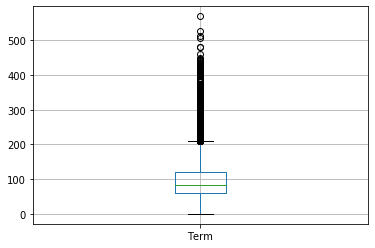

In [16]:

### Outliers check for "Term",  
data_cleaned.boxplot(column = ["Term"])

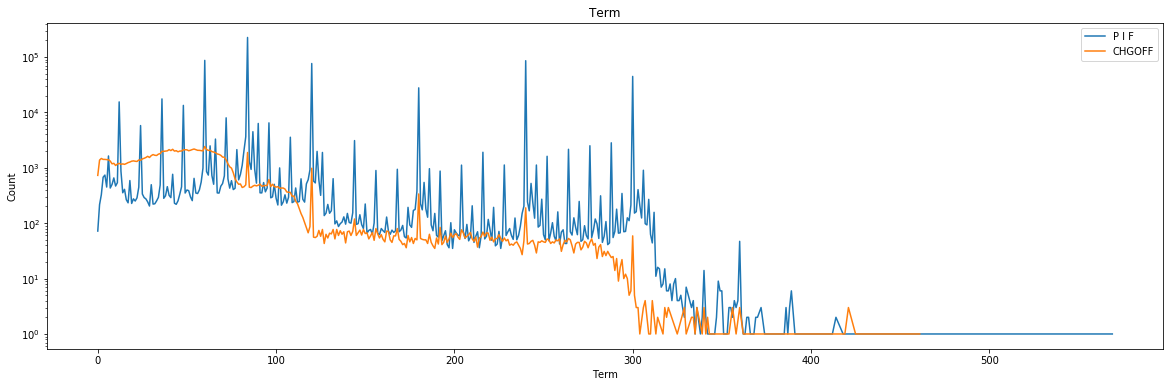

In [17]:
compare("Term")

In [18]:
##Based on the two graphs we can decide to remove the rows with 'Term' > 400
##remove rows which Term > 400, 35 rows be removwd
df_clear = data_cleaned
len(data_cleaned[data_cleaned.Term > 400])
df_clear = df_clear.drop(df_clear[df_clear['Term']>400].index)


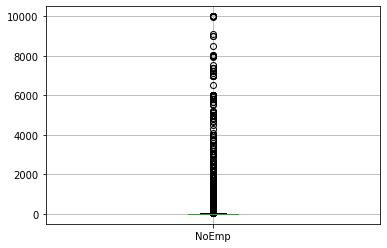

In [19]:
### Outliers check for "NoEmp", 
data_cleaned.boxplot(column = ["NoEmp"])

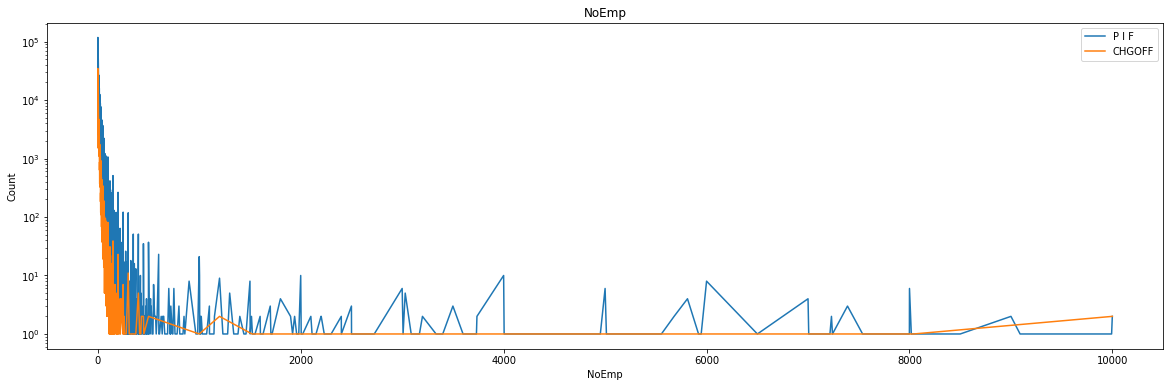

In [20]:
compare("NoEmp")

In [21]:
###According to the line chart we can see that the data is mainly concentrated in rows with NoEmp equal to 0-1000,
##so we decided to remove the rows with NoEmp>1000
##remove rows which NoEmp > 1000, 251 rows be removwd
len(data_cleaned[data_cleaned.NoEmp > 1000])
df_clear = df_clear.drop(df_clear[df_clear['NoEmp']> 1000].index)

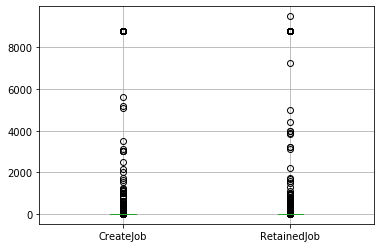

In [22]:
### Outliers check for "CreateJob,"RetainedJob"
data_cleaned.boxplot(column = ["CreateJob","RetainedJob"])

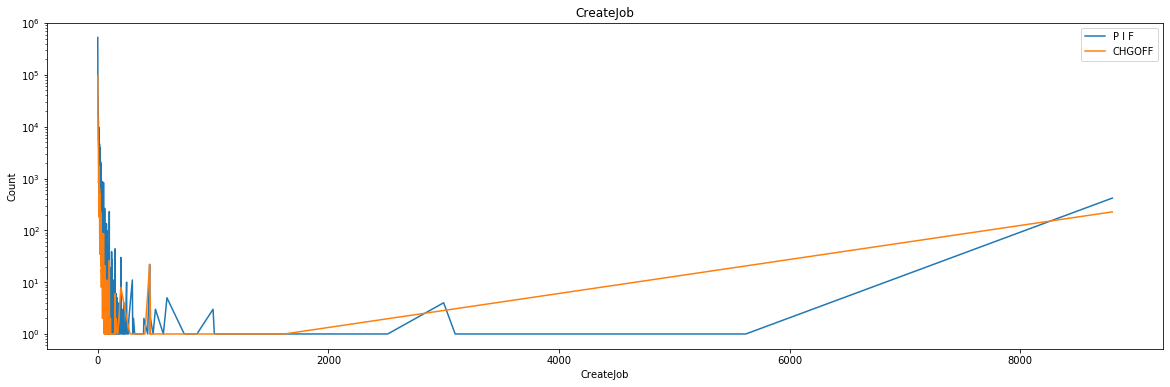

In [23]:
compare("CreateJob")

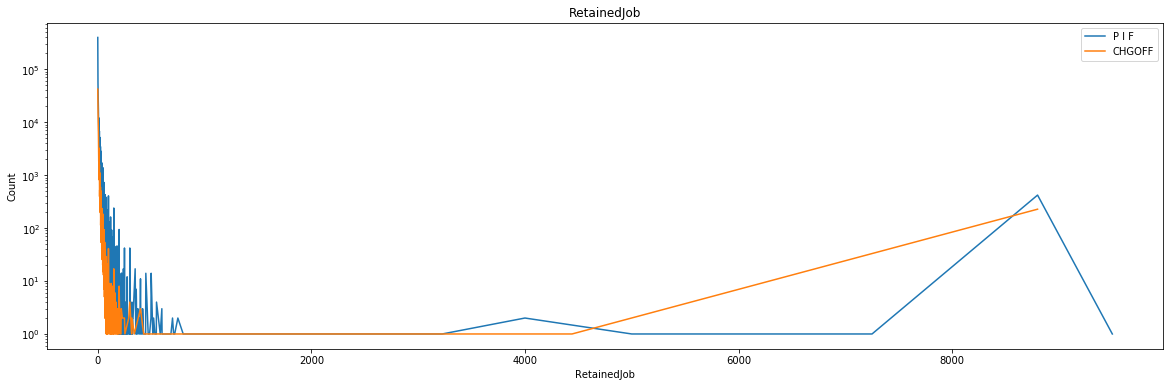

In [24]:
compare("RetainedJob")

In [25]:
### See data describe of CreateJob column, and the RetainedJob cloumn is similar with it
data_cleaned["CreateJob"].describe()

count    890381.000000
mean          8.463341
std         237.482483
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        8800.000000
Name: CreateJob, dtype: float64

In [26]:
##remove rows which CreateJob > 237, 847 rows be removwd
len(data_cleaned[data_cleaned.CreateJob > 237])
df_clear = df_clear.drop(df_clear[df_clear['CreateJob']> 237].index)

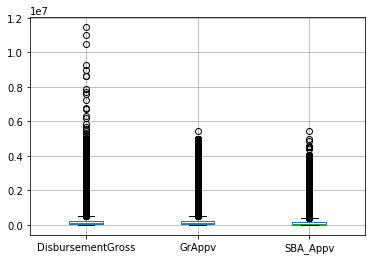

In [27]:
### Outliers check for "CDisbursementGross","GrAppv","SBA_Appv "
### 
data_cleaned.boxplot(column=["DisbursementGross","GrAppv","SBA_Appv"])


Regarding the handling of outliers in these three columns, 
we believe that the values in them represent the amount requested,
the amount approved by the bank and the amount released, and they are positively correlated, 
so we only need to handle the column with the most obvious outlier, which is the DisbursementGross column. 
However we also believe that this so-called outlier is caused by the possibility that some institutions are lending large amounts, 
and it is normal for some to lend more and some to lend less. 
So we thought it would be sufficient to simply remove the very obvious outliers.

In [28]:
data_cleaned["DisbursementGross"].describe()

count    8.903810e+05
mean     2.021595e+05
std      2.881231e+05
min      4.000000e+03
25%      4.300000e+04
50%      1.000000e+05
75%      2.400000e+05
max      1.144632e+07
Name: DisbursementGross, dtype: float64

In [29]:
##remove rows which DisbursementGross > 0.2e+7, 965 rows be removwd
len(data_cleaned[data_cleaned.DisbursementGross > 0.2e+7])
df_clear = df_clear.drop(df_clear[df_clear['DisbursementGross']> 0.2e+7].index)


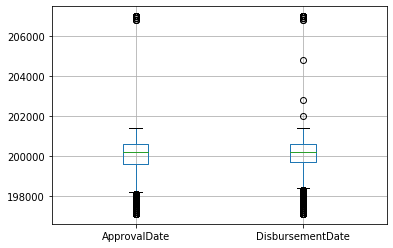

In [30]:
### Outliers check for "ApprovalDate","DisbursementDate"
### 
data_cleaned.boxplot(column=["ApprovalDate","DisbursementDate"])

In [48]:
##we can see we should move the rows which are before 198000 and after 2020.00
df_clear = df_clear.drop(df_clear[df_clear['ApprovalDate']> 202000].index)
df_clear = df_clear.drop(df_clear[df_clear['ApprovalDate']< 198000].index)
df_clear = df_clear.drop(df_clear[df_clear['DisbursementDate']> 202000].index)
df_clear = df_clear.drop(df_clear[df_clear['DisbursementDate']<198000].index)
df_clear

,State_code,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,GrAppv,SBA_Appv,MIS_Status,DaysToDisbursement,SBA_AppvPct,AppvDisbursed
0,15,45,199702,84,4,2.0,0,0,1,0,1,199902,60000.0,60000.0,48000.0,1,200,0.80,1
1,15,72,199702,60,2,2.0,0,0,1,0,1,199705,40000.0,40000.0,32000.0,1,3,0.80,1
2,15,62,199702,180,7,1.0,0,0,1,0,0,199712,287000.0,287000.0,215250.0,1,10,0.75,1
3,36,0,199702,60,2,1.0,0,0,1,0,1,199706,35000.0,35000.0,28000.0,1,4,0.80,1
4,9,0,199702,240,14,1.0,7,7,1,0,0,199705,229000.0,229000.0,229000.0,1,3,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,35,45,199702,60,6,1.0,0,0,1,0,0,199709,70000.0,70000.0,56000.0,1,7,0.80,1
899160,35,45,199702,60,6,1.0,0,0,1,0,0,199710,85000.0,85000.0,42500.0,1,8,0.50,1
899161,4,33,199702,108,26,1.0,0,0,1,0,0,199709,300000.0,300000.0,225000.0,1,7,0.75,1
899162,11,0,199702,60,6,1.0,0,0,1,0,1,199703,75000.0,75000.0,60000.0,0,1,0.80,1


In [32]:
### Outliers check for "NewExist", "UrbanRural","LowDoc","MIS_Status"
### Since these are all category data, we can use unique() to check if they contain outliers
### None of them have been checked to contain outliers
df_clear['NewExist'].unique()
df_clear['UrbanRural'].unique()
df_clear['LowDoc'].unique()
df_clear['MIS_Status'].unique()


array([1, 0], dtype=int64)

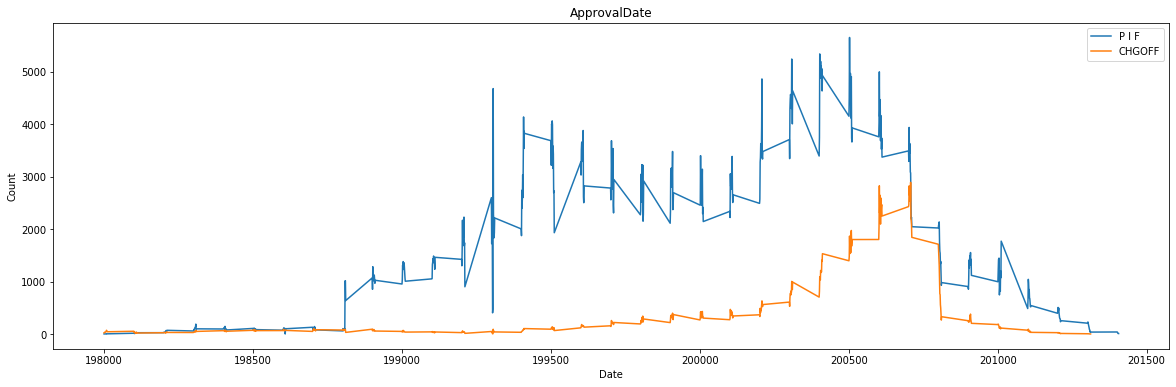

In [49]:
#2.4 Analysis of the data determines the final column 
## Since the subsequent discussion and analysis, 
##we have concluded that ApprovalDate, DisbursementDate and FranchiseCode have little impact on the prediction of the results. 

##In the following we confirm our suspicions with a graphical analysis.
# draw line plot for the ApprovalDate
date1 = df_clear.loc[df_clear['MIS_Status'] == 1, 'ApprovalDate']
date2 = df_clear.loc[df_clear['MIS_Status'] == 0, 'ApprovalDate']
#count number of date
date1 = date1.value_counts()
date2 = date2.value_counts()
#sort date
date1 = date1.sort_index()
date2 = date2.sort_index()
# draw line plot for the ApprovalDate
plt.figure(figsize=(20,6))
plt.plot(date1.index, date1.values, label = "P I F")
plt.plot(date2.index, date2.values, label = "CHGOFF")  
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('ApprovalDate')
plt.legend()
plt.show()

However, based on our experience and common sense, we believe that the timing of receipt of funds may have a negative relationship with a business's ability to repay, and the longer it takes to receive funds, the more difficult it is to repay. So we decided to generate a new indicator of how many days it takes from the approval of a loan to the actual disbursement of funds.

In [34]:
# Create DaysToDisbursement column which calculates the number of days passed between DisbursementDate and ApprovalDate
df_clear['DaysToDisbursement'] = df_clear['DisbursementDate'] - df_clear['ApprovalDate']
df_clear

,State_code,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,GrAppv,SBA_Appv,MIS_Status,DaysToDisbursement
0,15,451120,199702,84,4,2.0,0,0,1,0,1,199902,60000.0,60000.0,48000.0,1,200
1,15,722410,199702,60,2,2.0,0,0,1,0,1,199705,40000.0,40000.0,32000.0,1,3
2,15,621210,199702,180,7,1.0,0,0,1,0,0,199712,287000.0,287000.0,215250.0,1,10
3,36,0,199702,60,2,1.0,0,0,1,0,1,199706,35000.0,35000.0,28000.0,1,4
4,9,0,199702,240,14,1.0,7,7,1,0,0,199705,229000.0,229000.0,229000.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,35,451120,199702,60,6,1.0,0,0,1,0,0,199709,70000.0,70000.0,56000.0,1,7
899160,35,451130,199702,60,6,1.0,0,0,1,0,0,199710,85000.0,85000.0,42500.0,1,8
899161,4,332321,199702,108,26,1.0,0,0,1,0,0,199709,300000.0,300000.0,225000.0,1,7
899162,11,0,199702,60,6,1.0,0,0,1,0,1,199703,75000.0,75000.0,60000.0,0,1


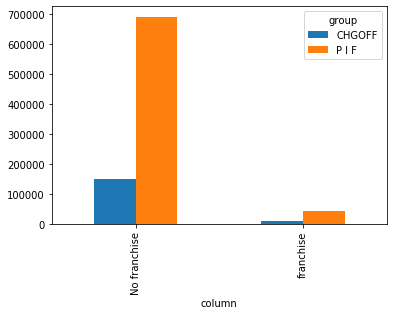

0.2140446690341197
0.17826296135077552


In [35]:
###As we can see from the above graph, the target "MIS_Status" is evenly distributed in relation to the ApprovalDate. 
### Therefore, we believe that time has no significant influence on the prediction of "MIS_Status" results.

###In Franchise_code, 0 or 1 means No franchise
nofranchise = data_cleaned.loc[(data_cleaned['FranchiseCode'] == 0) | (data_cleaned['FranchiseCode'] == 1)]
nop = nofranchise.loc[nofranchise["MIS_Status"] == 1]
nog = nofranchise.loc[nofranchise["MIS_Status"] == 0]

franchise = data_cleaned.loc[(data_cleaned['FranchiseCode'] != 0) & (data_cleaned['FranchiseCode'] != 1)]
p = franchise.loc[franchise["MIS_Status"] == 1]
g = franchise.loc[franchise["MIS_Status"] == 0]

df = pd.DataFrame([['P I F','No franchise',len(nop.index)],['P I F','franchise',len(p.index)],['CHGOFF','No franchise',len(nog.index)],['CHGOFF','franchise',len(g.index)]],
                   columns=['group','column','val'])
df.pivot("column", "group", "val").plot(kind='bar')

plt.show()
# proportion: No franchise:0.214  franchise: 0.179
print(len(nog.index)/len(nop.index))
print(len(g.index)/len(p.index))

##As we can see The difference between CHGOFF and PIF in No franchise and franchise is not very large, 
##but there is some difference, so we decided to keep the FranchiseCode column

In [36]:
#SBA_Appv and GrAppv are the amount of the loan guaranteed by the SBA and the amount of the loan to the user respectively.
#This is a unique feature of SBA loans in that the SBA will "guarantee" a percentage of the loan in the event of a loss. 
#For example, if a business receives a $1 million loan and the SBA guarantees 50%, 
#the SBA will cover a $100,000 loss if the business is unable to repay the $200,000 loan. 
#This makes these loans very attractive to small businesses because it mitigates the risk to the small business, 
#but also increases the risk to the SBA. This is why such an analysis is important! 
#These loans are usually guaranteed on a percentage basis, rather than a specified dollar amount,
#so we decided to create a field AppvDisbursed to represent this, rather than the guaranteed amount provided in the original dataset.
# Create AppvDisbursed flag field signifying if the loan amount disbursed was equal to the full amount approved

# Create SBA_AppvPct field since the guaranteed amount is based on a percentage of the gross loan amount rather than dollar amount in most situations
df_clear['SBA_AppvPct'] = df_clear['SBA_Appv'] / df_clear['GrAppv']

#I wanted to look at whether the loan amount disbursed was equal to the full amount approved,
#so I added that feature as well.

## Create AppvDisbursed flag field signifying if the loan amount disbursed was equal to the full amount approved
df_clear['AppvDisbursed'] = np.where(df_clear['DisbursementGross'] == df_clear['GrAppv'], 1, 0)
df_clear

,State_code,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,GrAppv,SBA_Appv,MIS_Status,DaysToDisbursement,SBA_AppvPct,AppvDisbursed
0,15,451120,199702,84,4,2.0,0,0,1,0,1,199902,60000.0,60000.0,48000.0,1,200,0.80,1
1,15,722410,199702,60,2,2.0,0,0,1,0,1,199705,40000.0,40000.0,32000.0,1,3,0.80,1
2,15,621210,199702,180,7,1.0,0,0,1,0,0,199712,287000.0,287000.0,215250.0,1,10,0.75,1
3,36,0,199702,60,2,1.0,0,0,1,0,1,199706,35000.0,35000.0,28000.0,1,4,0.80,1
4,9,0,199702,240,14,1.0,7,7,1,0,0,199705,229000.0,229000.0,229000.0,1,3,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,35,451120,199702,60,6,1.0,0,0,1,0,0,199709,70000.0,70000.0,56000.0,1,7,0.80,1
899160,35,451130,199702,60,6,1.0,0,0,1,0,0,199710,85000.0,85000.0,42500.0,1,8,0.50,1
899161,4,332321,199702,108,26,1.0,0,0,1,0,0,199709,300000.0,300000.0,225000.0,1,7,0.75,1
899162,11,0,199702,60,6,1.0,0,0,1,0,1,199703,75000.0,75000.0,60000.0,0,1,0.80,1


In [37]:
#Finally we would like to deal with the NAICS codes which refer to the industry to which each business belongs. 
#In this analysis we are really only interested in the general industry,
# So we use the first two digits of the NAICS code for each business to determine this.

# Selects only the first two numbers of the NAICS code
df_clear['NAICS'] = df_clear['NAICS'].map(lambda x: str(x)[:2])
df_clear

,State_code,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,GrAppv,SBA_Appv,MIS_Status,DaysToDisbursement,SBA_AppvPct,AppvDisbursed
0,15,45,199702,84,4,2.0,0,0,1,0,1,199902,60000.0,60000.0,48000.0,1,200,0.80,1
1,15,72,199702,60,2,2.0,0,0,1,0,1,199705,40000.0,40000.0,32000.0,1,3,0.80,1
2,15,62,199702,180,7,1.0,0,0,1,0,0,199712,287000.0,287000.0,215250.0,1,10,0.75,1
3,36,0,199702,60,2,1.0,0,0,1,0,1,199706,35000.0,35000.0,28000.0,1,4,0.80,1
4,9,0,199702,240,14,1.0,7,7,1,0,0,199705,229000.0,229000.0,229000.0,1,3,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,35,45,199702,60,6,1.0,0,0,1,0,0,199709,70000.0,70000.0,56000.0,1,7,0.80,1
899160,35,45,199702,60,6,1.0,0,0,1,0,0,199710,85000.0,85000.0,42500.0,1,8,0.50,1
899161,4,33,199702,108,26,1.0,0,0,1,0,0,199709,300000.0,300000.0,225000.0,1,7,0.75,1
899162,11,0,199702,60,6,1.0,0,0,1,0,1,199703,75000.0,75000.0,60000.0,0,1,0.80,1


In [38]:
###We can see that the ratio of MIS_Status = "P I F" to MIS_Status = "CHGOFF" is about the same for franchise and nofranchise.
###One ratio is 0.214 and the other 0.179.

### So we decide to remove  ApprovalDate, DisbursementDate and FranchiseCode columns
final_column_name = ["State_code","NAICS", "Term", "NoEmp", "NewExist", "CreateJob","FranchiseCode", "RetainedJob",  "UrbanRural", "LowDoc", "DaysToDisbursement","AppvDisbursed", "SBA_AppvPct", "MIS_Status"]
final_data = df_clear[final_column_name]
final_data.dtypes

State_code               int8
NAICS                  object
Term                    int64
NoEmp                   int64
NewExist              float64
CreateJob               int64
FranchiseCode           int64
RetainedJob             int64
UrbanRural              int64
LowDoc                  int32
DaysToDisbursement      int32
AppvDisbursed           int32
SBA_AppvPct           float64
MIS_Status              int64
dtype: object

In [39]:
# 2.5 Determining eigenvalues, target values
x = final_data.iloc[:, 1:12]
x.head()
y = final_data["MIS_Status"]
y.head()


0    1
1    1
2    1
3    1
4    1
Name: MIS_Status, dtype: int64

In [40]:
# 2.6 Segmentation of data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22)

In [41]:
# 3.Feature engineering (normalisation)
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

In [56]:
## 4.Machine Learning
## We will use Logical Regression,KNN, and XGBoost model to make predictions about the x_test

##KNN model
knn_estimator = KNeighborsClassifier( n_jobs=7)
# Prepare the hyperparameters to be tuned, use GridSearch find a good value K
param_dict = {"n_neighbors": [5,7,9]}
knn_estimator = GridSearchCV(knn_estimator, param_grid=param_dict, cv=3)
knn_estimator.fit(x_train, y_train)

# KNN Model evaluation
y_predict = knn_estimator.predict(x_test)
# Print the results
print(classification_report(y_test,y_predict, digits=3))

              precision    recall  f1-score   support

           0      0.727     0.551     0.627     39096
           1      0.909     0.956     0.932    182970

    accuracy                          0.885    222066
   macro avg      0.818     0.753     0.779    222066
weighted avg      0.877     0.885     0.878    222066



In [52]:
# Logical Regression
lr_estimator = LogisticRegression()
lr_estimator.fit(x_train, y_train)

#LR Model evaluation
y_predict = lr_estimator.predict(x_test)
# Print the results
print(classification_report(y_test,y_predict, digits=3))

              precision    recall  f1-score   support

           0      0.657     0.200     0.306     39096
           1      0.851     0.978     0.910    182970

    accuracy                          0.841    222066
   macro avg      0.754     0.589     0.608    222066
weighted avg      0.817     0.841     0.804    222066



In [54]:
#XGBoost model
xgboost = XGBClassifier(random_state=2,n_jobs = 7)
xgboost.fit(x_train, y_train)

#LR Model evaluation
y_predict = xgboost.predict(x_test)
# Print the results
print(classification_report(y_test,y_predict, digits=3))

[19:20:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0      0.838     0.796     0.816     39096
           1      0.957     0.967     0.962    182970

    accuracy                          0.937    222066
   macro avg      0.897     0.882     0.889    222066
weighted avg      0.936     0.937     0.936    222066



In [57]:
#finally We can see here that the XGBoost model has the best results, 
#predicting 97.2% of the data that can be repaid and 88.4% of the data that cannot be repaid, 
#for an overall prediction accuracy of 93.7%